In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

Read and Load Dataset 

In [2]:
hotel_data=pd.read_csv("G:\\one_nuron_machine_learning_bootcamp\\MAS_Project\\Hotel Booking DA and Cancellation Predictions\\hotel_bookings.csv")

In [3]:
#Display the data 
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#checking for number of rows and columns
hotel_data.shape

(119390, 32)

So 32 columns and 119390 rows 

In [5]:
# Counting the number of occurrences of each unique value in the in_column 
hotel_data['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

We see that approx 62% for class 0 (not cancel) and 37% for class 1 (cancel) 


In [6]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Cleaning 


In [8]:
#Checking for duplicate values 
hotel_data.duplicated().any()

True

So the data set has duplicate entries 

In [9]:
#Dropping duplicate values 
hotel_data.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### cheking percentage of missing values in each column

In [10]:
null=100*hotel_data.isnull().sum()/hotel_data.shape[0]
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

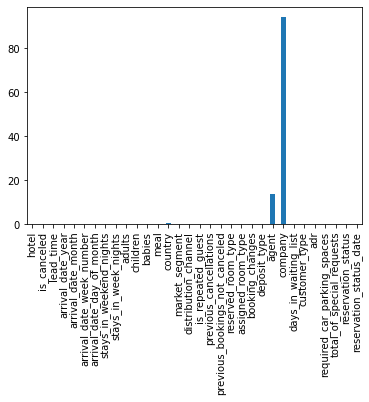

In [11]:
null.plot(kind='bar')
plt.show()


We can see that company column has 94%  of missing value . So we'll drop that column 

In [12]:
#Dropping the column named company
hotel_data.drop('company',axis=1,inplace=True)

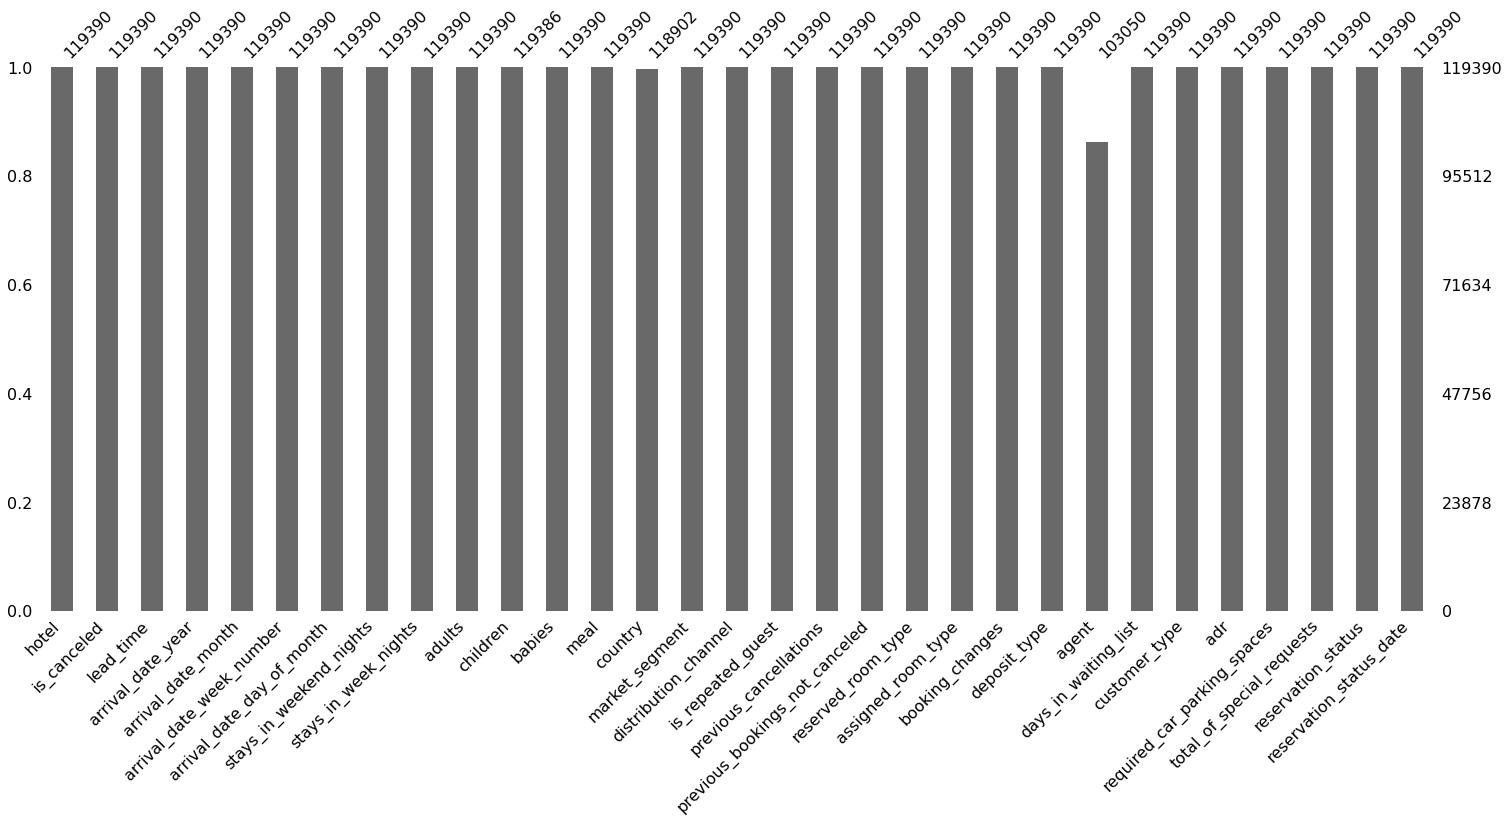

In [13]:
#visualizing the missing values using missingo 
import missingno as msngo
msngo.bar(hotel_data)
plt.show()

In [14]:
hotel_data['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

We can see that maximum value occurance is 9 so we replace the missing value with 9 

In [15]:
hotel_data['agent'].fillna(9,inplace=True)

In [16]:
hotel_data['children'].fillna(0,inplace=True)

In [17]:
hotel_data['country'].fillna(hotel_data['country'].mode()[0],inplace=True)

## EDA 
univariate , bivariate , multivariate analysis 

In [18]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [19]:
# find the coorelation between is-canceled column and other column 
hotel_data.corr()['is_canceled'][:]

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.049857
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

highest positive correlations : lead_time followed by previous_cancellations\
highest negative correlations : total_of_special_requests, required_car_parking_spaces

### Checking cancelation rate for city and resort hotel


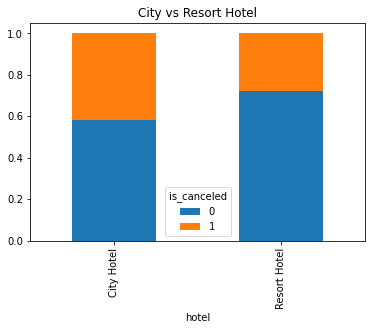

cancellation in city hotel is  41.73 %
cancellation in resort hotel is 27.76 %


In [20]:
city_resort=pd.crosstab(hotel_data['hotel'],hotel_data['is_canceled'])
city_resort=city_resort.div(city_resort.sum(axis=1),axis=0)

city_resort_plot=city_resort.div(city_resort.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title='City vs Resort Hotel')
plt.show()

print('cancellation in city hotel is ',round(city_resort.iloc[0,1]*100,2) ,'%')
print('cancellation in resort hotel is',round(city_resort.iloc[1,1]*100,2),'%')


We can see that cancellattion rate in city hotel is more that Resort hotel

### Lead time 


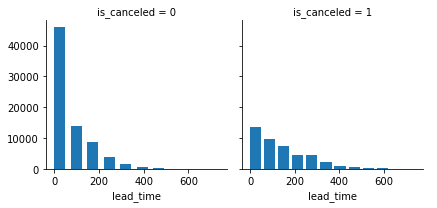

In [21]:
grid=sns.FacetGrid(hotel_data,col='is_canceled')
grid.map(plt.hist,'lead_time',width=50)
grid.add_legend()
plt.show()

Maximum cancelations occur if the booking is made 60-70 days before the checkin date

### checking customer having babies 

In [22]:
len(hotel_data.loc[(hotel_data['children']!=0) | (hotel_data['babies']!=0)])/len(hotel_data)*100

7.816400033503644

So only 8% coustomer of the total data have babies or children or both so this infromation will not have much impact on our prediction. This information can be ignored

### Checking cancellation among new guest vs repeated guest 

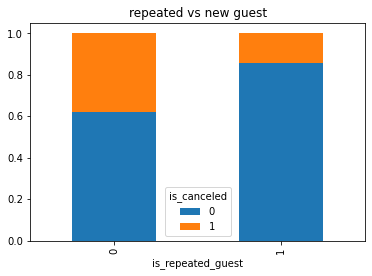

cancellation rate in new customers is  37.79 %
cancellation rate in repeated customers is  14.49 %


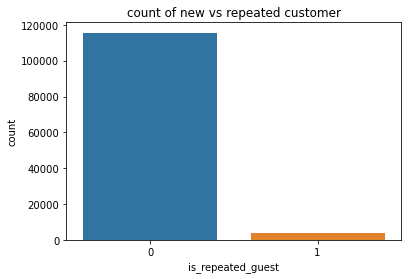

In [23]:
old_new_guest=pd.crosstab(hotel_data['is_repeated_guest'],hotel_data['is_canceled'])
old_new_guest=old_new_guest.div(old_new_guest.sum(axis=1),axis=0)
old_new_guest_plot=old_new_guest.plot(kind='bar',stacked=True,title='repeated vs new guest')
plt.show()

print('cancellation rate in new customers is ',round(old_new_guest.iloc[0,1]*100,2),'%')
print('cancellation rate in repeated customers is ',round(old_new_guest.iloc[1,1]*100,2),'%')

sns.countplot(x='is_repeated_guest',data=hotel_data)
plt.title('count of new vs repeated customer')
plt.show()


We can see that cancellation rate is more among the new customers and also see that no. of new customer is much more than the reapeated guest

### cheking what are the counts of cancellation when customer did not get the reserved room

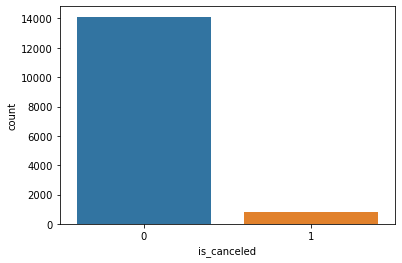

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

In [24]:
room=hotel_data.loc[hotel_data['reserved_room_type']!=hotel_data['assigned_room_type']]
sns.countplot(x='is_canceled',data=room)
plt.show()
room['is_canceled'].value_counts(normalize=True)*100

So only approx ***5%*** customer cancel their booking when they are not assigned to their prefferd room while booking

### checking the relation of booking type and cancellation 

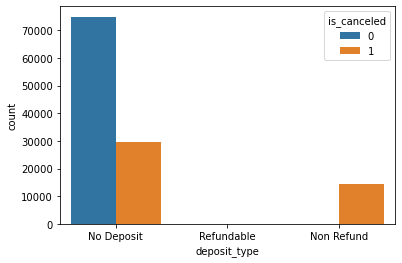

In [25]:
sns.countplot(x="deposit_type", hue="is_canceled",data=hotel_data);

We can see that Non refundable bookings are all canceled 

### No of waiing days and cancellation

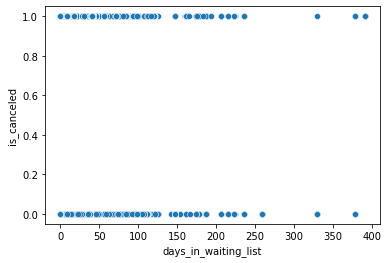

In [26]:
sns.scatterplot(x='days_in_waiting_list',y='is_canceled',data=hotel_data)
plt.show()

We can see that no relation between them

### arrival year vs cancellation

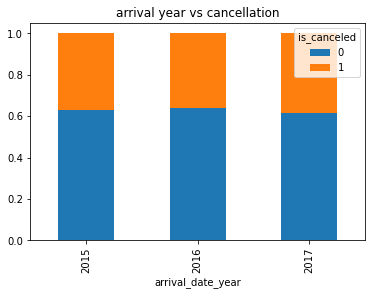

In [27]:
arrival=pd.crosstab(hotel_data['arrival_date_year'],hotel_data['is_canceled'])
arrival=arrival.div(arrival.sum(axis=1),axis=0)
arrival_plot=arrival.plot(kind='bar',stacked=True,title='arrival year vs cancellation')
plt.show()


We can see that % of cancellation over the arrival year is almost same 

### arrival month vs cancellaion

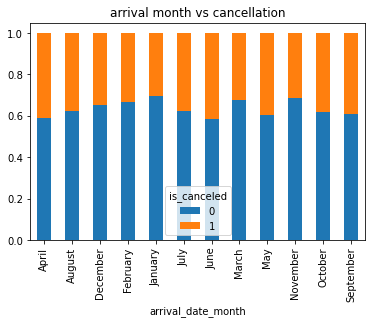

In [28]:
arrival_month=pd.crosstab(hotel_data['arrival_date_month'],hotel_data['is_canceled'])
arrival_month=arrival_month.div(arrival_month.sum(axis=1),axis=0)
arrival_month_plt=arrival_month.plot(kind='bar',stacked=True,title='arrival month vs cancellation')
plt.show()

So June has higher cancellation rate compare to other months 

### customer type 

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


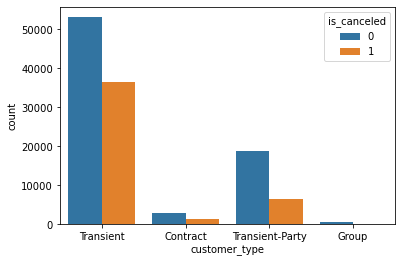

In [29]:
print(hotel_data['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=hotel_data, x='customer_type', hue='is_canceled')
plt.show()

Soa 75% booking was done by the ***Transient*** category of customer and cancellation rate is also high in this category 

## Multivariate analysis 

### hotel booking in differnt type of hotel in different year 

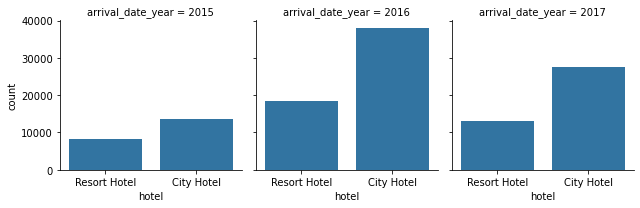

In [30]:
grid=sns.FacetGrid(hotel_data,col='arrival_date_year')
grid.map(sns.countplot,'hotel')
plt.show()

So In every year City hotels had more bookings than the Resort hotel

### meal and customer type

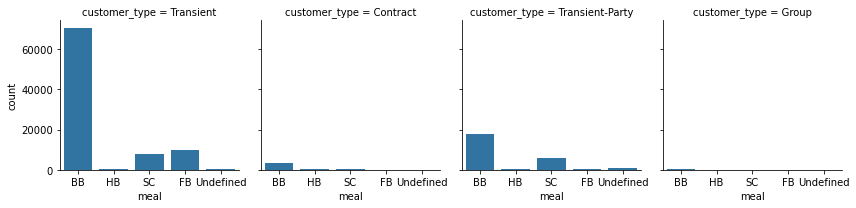

In [31]:
grid=sns.FacetGrid(hotel_data,col='customer_type')
grid.map(sns.countplot,'meal')
plt.show()

So we can see that Customer prefer ***BB*** type meal most

In [32]:
hotel_data.pivot_table(columns='hotel', values='country',aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


People from country with ISO code ***'PRT'*** made the most number of bookings in both types of hotels.

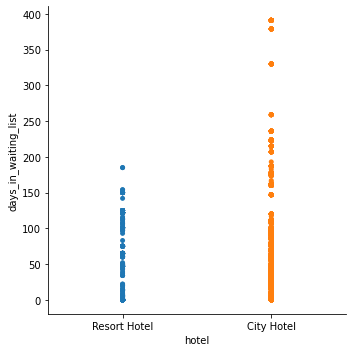

In [33]:
# showing which type of hotel has more no. of waiting days 
sns.catplot(data=hotel_data, x='hotel', y='days_in_waiting_list', jitter=False)

So ***city hotels*** have much larger waiting time 

## Data Preprocessing and analysis and Feature Engineering

babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time.

In [34]:
#filter = (hotel_data.children == 0) & (hotel_data.adults == 0) & (hotel_data.babies == 0)

In [35]:
#hotel_data[filter]

In [36]:
#hotel_data = hotel_data[~filter]
#hotel_data

In [37]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

hotel_data.drop(useless_col, axis = 1, inplace = True)

In [38]:
cat_cols = [col for col in hotel_data.columns if hotel_data[col].dtype == 'O']
cat_cols
cat_df = hotel_data[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [39]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [40]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [41]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0.0,0,0,0,7,1
1,0,0,0,0,0.0,0,0,0,7,1
2,0,0,0,0,1.0,0,0,0,7,2
3,0,0,1,1,1.0,0,0,0,7,2
4,0,0,2,2,1.0,0,0,0,7,3


In [42]:
num_df = hotel_data.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,9.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,9.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,9.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,104.40,0,0


In [43]:
num_df['adr'].fillna(0,inplace=True)


In [44]:
num_df.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158846
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             11304.623994
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

Normalized numerical columns that have high variance

In [45]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)

num_df['adr'] = np.log(num_df['adr'] + 1)

## Model Selection

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
X = pd.concat([cat_df, num_df], axis = 1)
X.fillna(0,inplace=True)
y = hotel_data['is_canceled']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

### Logestic Regression 

In [49]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
scores = cross_val_score(lr, X_train, y_train, cv=5)
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred_lr)))
print("Test accuracy:" , lr.score(X_test,y_test))
print("Confusion Matrix :")
print(conf)
print("Classification Report :")
print(clf_report)

Average cross validation score: 0.811
F1 score: 0.694
Test accuracy: 0.8106764944020995
Confusion Matrix :
[[21332  1146]
 [ 5635  7704]]
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22478
           1       0.87      0.58      0.69     13339

    accuracy                           0.81     35817
   macro avg       0.83      0.76      0.78     35817
weighted avg       0.82      0.81      0.80     35817



### KNeighborsClassifier 

In [50]:
#applying KNN
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred_knn)))
print("Test accuracy:" , knn.score(X_test,y_test))
print("Confusion Matrix :")
print(conf)
print("Classification Report :")
print(clf_report)

Average cross validation score: 0.885
F1 score: 0.843
Test accuracy: 0.8934304938995449
Confusion Matrix :
[[21741   737]
 [ 3080 10259]]
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22478
           1       0.93      0.77      0.84     13339

    accuracy                           0.89     35817
   macro avg       0.90      0.87      0.88     35817
weighted avg       0.90      0.89      0.89     35817



### DecisionTree classifier 

In [51]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
scores=cross_val_score(dt,X_train,y_train,cv=5)
y_pred_dt=dt.predict(X_test)

acc_dt=accuracy_score(y_test,y_pred_dt)
conf=confusion_matrix(y_test,y_pred_dt)
clf_report=classification_report(y_test,y_pred_dt)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("F1 score: {:.3f}".format(f1_score(y_test,y_pred_dt)))
print("Test accuracy:",dt.score(X_test,y_test))
print("Confusion Matrix :")
print(conf)
print("Classification Report :")
print(clf_report)

Average cross validation score: 0.939
F1 score: 0.922
Test accuracy: 0.9423178937376107
Confusion Matrix :
[[21477  1001]
 [ 1065 12274]]
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22478
           1       0.92      0.92      0.92     13339

    accuracy                           0.94     35817
   macro avg       0.94      0.94      0.94     35817
weighted avg       0.94      0.94      0.94     35817



### RandomForest

In [52]:
#Randomforest 
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
scores=cross_val_score(rf,X_train,y_train,cv=5)
y_pred_rf=rf.predict(X_test)

acc_rf=accuracy_score(y_test,y_pred_rf)
conf=confusion_matrix(y_test,y_pred_rf)
clf_report=classification_report(y_test,y_pred_rf)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("F1 score: {:.3f}".format(f1_score(y_test,y_pred_rf)))
print("Test accuracy",rf.score(X_test,y_test))
print("Confusion Matrix :")
print(conf)
print("Classification Report :")
print(clf_report)


Average cross validation score: 0.948
F1 score: 0.937
Test accuracy 0.9553843147108915
Confusion Matrix :
[[22299   179]
 [ 1419 11920]]
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     22478
           1       0.99      0.89      0.94     13339

    accuracy                           0.96     35817
   macro avg       0.96      0.94      0.95     35817
weighted avg       0.96      0.96      0.95     35817



### Grid search CV on the Random forest to find the best hyperparameters

In [77]:
param_grid={'n_estimators':[50,100,150],
           'max_depth':[None,2,5],
           'min_samples_split':[2,5],
           'min_samples_leaf':[1,2]}
param_grid

#n_estimators: no. of decision trees 
#max_feature: no. of features to be considered at every split 
# max_depth: depth of the decision tree , more depth means more split 
# min_sample_spli: min no. of samples required to split a node 
# min_samples_leaf : min no. of sample required to make a node a leaf node 
#bootstrap : True means classifier will take random samples form the original data 

{'n_estimators': [50, 100, 150],
 'max_depth': [None, 2, 5],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [78]:
rf_model=RandomForestClassifier()
rf_grid=GridSearchCV(estimator= rf_model,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)

In [79]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None, 2, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [72]:
rf_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

### Applying Random forest againg with the tuned hyperparameter 

In [76]:
rf_tuned =RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=2)
rf_tuned.fit(X_train,y_train)
scores=cross_val_score(rf_tuned,X_train,y_train,cv=5)
y_pred_rf_tuned=rf_tuned.predict(X_test)

acc_rf=accuracy_score(y_test,y_pred_rf_tuned)
conf=confusion_matrix(y_test,y_pred_rf_tuned)
clf_report=classification_report(y_test,y_pred_rf_tuned)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("F1 score: {:.3f}".format(f1_score(y_test,y_pred_rf_tuned)))
print("Test accuracy",rf_tuned.score(X_test,y_test))
print("Confusion Matrix :")
print(conf)
print("Classification Report :")
print(clf_report)

Average cross validation score: 0.747
F1 score: 0.412
Test accuracy 0.7241533350085155
Confusion Matrix :
[[22471     7]
 [ 9873  3466]]
Classification Report :
              precision    recall  f1-score   support

           0       0.69      1.00      0.82     22478
           1       1.00      0.26      0.41     13339

    accuracy                           0.72     35817
   macro avg       0.85      0.63      0.62     35817
weighted avg       0.81      0.72      0.67     35817

